In [70]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Loading data

df = pd.read_csv("df_full_clean.csv")

df.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,...,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,CMQ_above_avg,CMQ_high
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,10.0,9.0,0.0,...,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,6.0,6.0,3.0,...,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,4.0,7.0,5.0,...,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,0
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,7.0,5.0,4.0,...,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,0
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,10.0,10.0,0.0,...,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            84264 non-null  object 
 1   Sex                84264 non-null  object 
 2   Age                84264 non-null  float64
 3   Edu_high           84264 non-null  float64
 4   Edu_low            84264 non-null  float64
 5   Pol_Ori            84264 non-null  float64
 6   CPO                84264 non-null  float64
 7   CMQ_1              84264 non-null  float64
 8   CMQ_2              84264 non-null  float64
 9   CMQ_3              84264 non-null  float64
 10  CMQ_4              84264 non-null  float64
 11  CMQ_5              84264 non-null  float64
 12  CM4x               84264 non-null  float64
 13  CM5x               84264 non-null  float64
 14  Winner_state       84264 non-null  float64
 15  lrgen              84264 non-null  float64
 16  lrecon             842

In [73]:
# # One-hot encoding
# df = pd.get_dummies(df)

# df.head()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84264 entries, 0 to 84263
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            84264 non-null  object 
 1   Sex                84264 non-null  object 
 2   Age                84264 non-null  float64
 3   Edu_high           84264 non-null  float64
 4   Edu_low            84264 non-null  float64
 5   Pol_Ori            84264 non-null  float64
 6   CPO                84264 non-null  float64
 7   CMQ_1              84264 non-null  float64
 8   CMQ_2              84264 non-null  float64
 9   CMQ_3              84264 non-null  float64
 10  CMQ_4              84264 non-null  float64
 11  CMQ_5              84264 non-null  float64
 12  CM4x               84264 non-null  float64
 13  CM5x               84264 non-null  float64
 14  Winner_state       84264 non-null  float64
 15  lrgen              84264 non-null  float64
 16  lrecon             842

In [75]:
# Dropping extra target columns

X = df.drop(columns=['CMQ_1','CMQ_2','CMQ_3','CMQ_4','CMQ_5','CMQ_above_avg','CMQ_high'])

In [76]:
from sklearn.utils import resample

X_small = resample(X, n_samples=9000, replace=False)

In [77]:
X_dummies = pd.get_dummies(X_small)

X_dummies.head()

,Age,Edu_high,Edu_low,Pol_Ori,CPO,CM4x,CM5x,Winner_state,lrgen,lrecon,...,Country_Romania,Country_Serbia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkiye,Country_United Kingdom,Sex_female,Sex_male,Sex_other/unknown
60850,50.833333,0.0,1.0,6.0,-1.205659,10.00,10.0,0.0,5.901813,5.572278,...,1,0,0,0,0,0,0,1,0,0
19322,41.000000,0.0,0.0,5.0,0.618241,5.75,6.2,0.0,5.058697,4.776238,...,0,0,0,0,0,0,0,0,1,0
61113,46.323401,0.0,0.0,8.0,2.953568,5.25,5.8,1.0,6.100000,6.400000,...,0,0,0,0,0,0,0,0,1,0
62100,70.666667,1.0,0.0,4.0,-1.398637,6.50,6.8,1.0,5.466667,6.533333,...,0,0,0,0,0,0,0,0,1,0
31439,39.000000,1.0,0.0,3.0,-1.261508,4.00,3.6,0.0,2.000000,2.285714,...,0,0,0,0,0,0,1,0,1,0


In [78]:
# Scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X_dummies)

# Checking
X_scaled[0]

array([ 0.27793051, -1.14951403,  3.27861972,  0.34815581, -0.50022352,
        1.97642503,  1.94644727, -0.62825165,  0.39096887,  0.36314381,
        0.33514706, -0.92519646, -0.59381537, -0.33934708, -0.16903085,
       -0.24176426, -0.05879073, -0.13581301, -0.0832867 , -0.06928719,
       -0.15075567, -0.31384505, -0.23657178, -0.07088812, -0.21847178,
       -0.0732252 , -0.0568563 , -0.24279232, -0.61039243, -0.08725295,
       -0.14959524, -0.21707238, -0.2113989 ,  4.35889894, -0.10273598,
       -0.28154236, -0.19448105, -0.09529814, -0.10599979, -0.16012815,
        1.16766664, -1.10256851, -0.17041669])

In [79]:
len(X_scaled)

9000

In [80]:
len(X_small)

9000

In [81]:
X_small.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score
60850,Romania,female,50.833333,0.0,1.0,6.0,-1.205659,10.00,10.0,0.0,5.901813,5.572278,5.029759,2.101470e+11,4.93,8
19322,Netherlands,male,41.000000,0.0,0.0,5.0,0.618241,5.75,6.2,0.0,5.058697,4.776238,4.311222,8.338700e+11,4.84,9
61113,Austria,male,46.323401,0.0,0.0,8.0,2.953568,5.25,5.8,1.0,6.100000,6.400000,7.200000,4.172610e+11,5.50,9
62100,Netherlands,male,70.666667,1.0,0.0,4.0,-1.398637,6.50,6.8,1.0,5.466667,6.533333,1.000000,8.338700e+11,4.84,9
31439,United Kingdom,male,39.000000,1.0,0.0,3.0,-1.261508,4.00,3.6,0.0,2.000000,2.285714,0.846154,2.683490e+12,4.33,9


In [85]:
np.savetxt('X_scaled.csv', X_scaled, delimiter='\t')

In [83]:
X_small.to_csv('X_small.csv', sep='\t')

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
principal_components = tsne.fit_transform(X)

#print(pca.explained_variance_ratio_)

AttributeError: 'TSNE' object has no attribute 'explained_variance_ratio_'

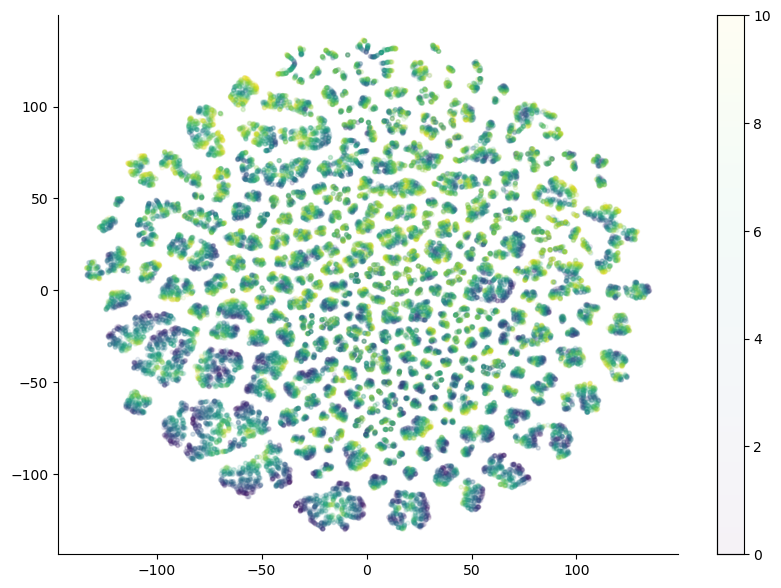

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(principal_components[:,0],
            principal_components[:,1],
            s=8,
            alpha=0.05,
            c=df['CM5x'])
plt.colorbar()
plt.title('')
sns.despine()
plt.show()

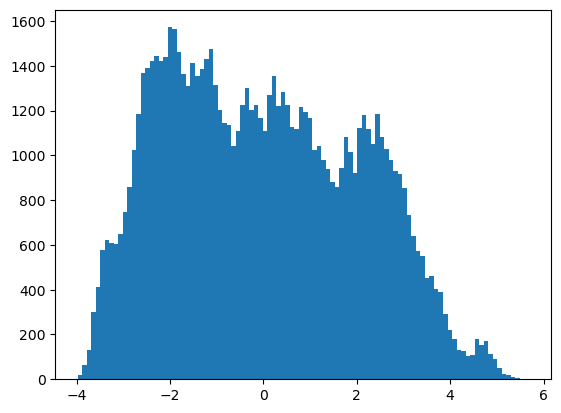

In [38]:
plt.figure()
plt.hist(principal_components[:,0], bins=100)
plt.show()

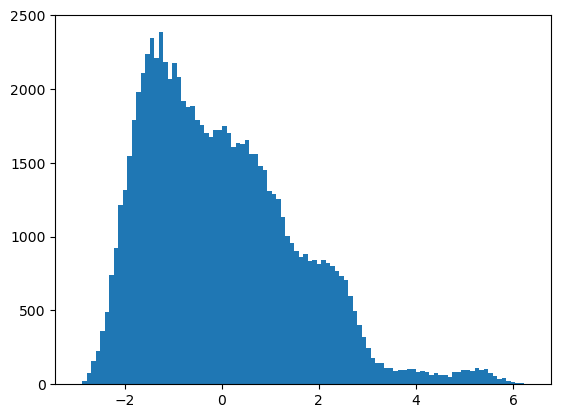

In [39]:
plt.figure()
plt.hist(principal_components[:,1], bins=100)
plt.show()

In [7]:
from sklearn.cluster import KMeans
# Look over a range of K values
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(X)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)

/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

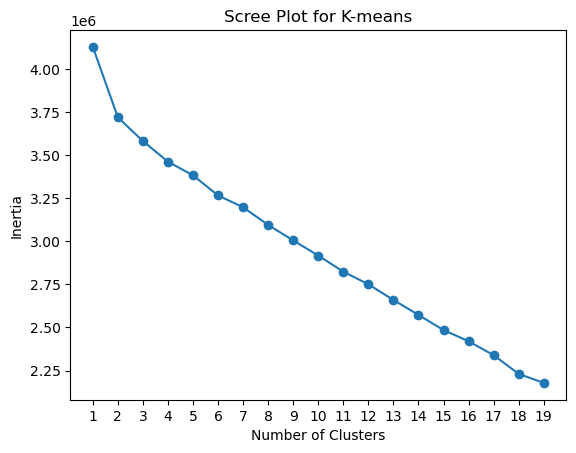

In [8]:
# Visualize
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means')
plt.xticks(k_range)
plt.show();

In [9]:
# Repeating without countries or extra CMQ columns
df2 = pd.read_csv('df_full_clean.csv')

df2.drop(columns=["Country","CMQ_above_avg","CMQ_high"], inplace=True)

df2.head()

,Sex,Age,Edu_high,Edu_low,Pol_Ori,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score
0,male,33.0,1.0,0.0,4.2,10.0,9.0,0.0,6.0,0.0,4.00,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10
1,male,28.0,1.0,0.0,4.2,6.0,6.0,3.0,2.0,4.0,3.75,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10
2,male,55.0,1.0,0.0,5.0,4.0,7.0,5.0,3.0,2.0,3.50,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10
3,male,52.0,0.0,1.0,5.8,7.0,5.0,4.0,6.0,5.0,5.50,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10
4,male,56.0,0.0,1.0,5.0,10.0,10.0,0.0,8.0,6.0,6.00,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10


In [10]:
# One-hot encoding again
X2 = pd.get_dummies(df2)

X2.head()

,Age,Edu_high,Edu_low,Pol_Ori,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,...,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,Sex_female,Sex_male,Sex_other/unknown
0,33.0,1.0,0.0,4.2,10.0,9.0,0.0,6.0,0.0,4.00,...,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,1,0
1,28.0,1.0,0.0,4.2,6.0,6.0,3.0,2.0,4.0,3.75,...,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,1,0
2,55.0,1.0,0.0,5.0,4.0,7.0,5.0,3.0,2.0,3.50,...,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,1,0
3,52.0,0.0,1.0,5.8,7.0,5.0,4.0,6.0,5.0,5.50,...,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,1,0
4,56.0,0.0,1.0,5.0,10.0,10.0,0.0,8.0,6.0,6.00,...,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,1,0


In [11]:
# Scaling again
ss = StandardScaler()
X2 = ss.fit_transform(X2)

# Checking
X2[0]

array([-0.79961972,  0.86218853, -0.30575414, -0.36453717,  1.18602129,
        0.81654025, -1.78124   ,  0.49061979, -1.75080962, -0.66107833,
       -0.36158006, -0.63513324, -0.25404646, -0.23893474, -0.19652152,
       -1.11117043, -1.11037677,  1.11855082, -0.87269248,  0.91933868,
       -0.16246724])

In [12]:
# Creating inertia list again

# Look over a range of K values
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(X2)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)

/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elliotcarter/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

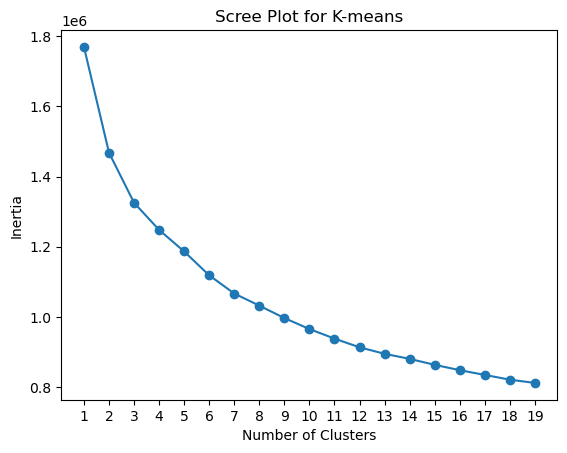

In [13]:
# Visualize again
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means')
plt.xticks(k_range)
plt.show();

In [ ]:
# Trying model with k=6
# Instantiate
k_means6 = KMeans(n_clusters=6)

# Fit
k_means6.fit(X2)

print("Inertia:", k_means6.inertia_)


In [17]:
# Silhouette score
from sklearn.metrics import silhouette_score
cluster_labels = k_means6.predict(X2)
print("Silhouette score:", silhouette_score(X2, cluster_labels))

Silhouette score: 0.11760738024400534


In [18]:
from sklearn.cluster import DBSCAN

# Instantiate an empty list of silhouette scores and cluster counts
silhouette_scores = []
n_clusters = []
eps = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]

# Iterate over eps
for e in eps:
    
    # Instantiate
    dbscan_model = DBSCAN(eps=e, min_samples=8)

    # Fit
    cluster_labels = dbscan_model.fit_predict(X2)
    
    # Find non-noise points
    non_noise = cluster_labels[cluster_labels != -1]
    
    # Get silhouette score and number of clusters
    n_cluster = len(np.unique(non_noise))
    
    if n_cluster > 1:
        silhouette = silhouette_score(X2, cluster_labels)
    else:
        silhouette = np.NaN
    
    # Append to list
    n_clusters.append(n_cluster)
    silhouette_scores.append(silhouette)

In [ ]:
# Put in a dataframe
pd.DataFrame({'eps':eps, 'n_clusters':n_clusters, 'silhouette':silhouette_scores})

In [14]:
df2.head()

,Sex,Age,Edu_high,Edu_low,Pol_Ori,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score
0,male,33.0,1.0,0.0,4.2,10.0,9.0,0.0,6.0,0.0,4.00,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10
1,male,28.0,1.0,0.0,4.2,6.0,6.0,3.0,2.0,4.0,3.75,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10
2,male,55.0,1.0,0.0,5.0,4.0,7.0,5.0,3.0,2.0,3.50,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10
3,male,52.0,0.0,1.0,5.8,7.0,5.0,4.0,6.0,5.0,5.50,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10
4,male,56.0,0.0,1.0,5.0,10.0,10.0,0.0,8.0,6.0,6.00,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10
